In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
table00 = pd.read_json("data/merged-01-00", lines=True)
small = pd.read_json("data/merged-01-00-snippet", lines=True)

In [3]:
# extras
table01 = pd.read_json("data/merged-01-01", lines=True)
table14 = pd.read_json("data/merged-02-14", lines=True)
table20 = pd.read_json("data/merged-03-20", lines=True)

In [6]:
pd.set_option('display.max_columns', 100)
table00.head(2)

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,bid_requests,bid_responses,c_cnt,c_flag_cnt,c_timestamp,c_txn_fee,c_txn_rate,campaign_id,campaign_type,ck,cr_cnt,creative_id,exp_mode,f_cnt,flag,geo_area_code,geo_city_code,geo_city_name,geo_continent_code,geo_country_code2,geo_country_code3,geo_dma_code,geo_postal_code,geo_region_name,geo_timezone,i_cnt,i_flag_cnt,i_timestamp,i_txn_fee,i_txn_rate,ip_address,is_bot,is_fraud,keywords,num_ads,preview,pub_campaign_id,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,r_timestamp,rate_metric,referer,session_id,site_id,token,txn_fee,txn_rate,ua,ua_device,ua_device_type,ua_major,ua_minor,ua_name,ua_os,ua_os_name,url,user_agent,uuid,vi_cnt,vi_flag_cnt,vi_timestamp,vv_cnt,widget_id,zone_id
0,an-prod-ralphie-frontline-bulks.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,NaN,NaN,20523,private,"{""widget_type"": [""text_feed""]}",1,1454941,NaN,0.0,NaN,203.0,5282901.0,Brookfield,NA,US,USA,501.0,06804,CT,America/New_York,1.0,0.0,2018-04-01T00:56:55.982000Z,NaN,NaN,68.116.200.34,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:56:55.194040Z,CPC,http%3A%2F%2Fwww.breitbart.com%2Fbig-journalis...,706a0d7116b840a194c81b49edbc0a29_f7ec539c,13042,6XKC5K21,NaN,NaN,Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,iPad,TAB,10.0,0.0,Mobile Safari,iOS 10.3,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,60039c05-5285-49ca-b4eb-a435e9d8352b,0.0,0.0,NaN,0.0,NaN,26024
1,an-prod-ralphie-frontline-bedim.us-east-1,1349,[story],1,3587,[],[],0.0,0.0,NaN,NaN,NaN,20523,private,"{""widget_type"": [""text_feed""]}",1,1454941,NaN,0.0,NaN,205.0,4083697.0,Pinson,NA,US,USA,630.0,35126,AL,America/Chicago,1.0,0.0,2018-04-01T00:45:42.182000Z,NaN,NaN,174.223.128.183,NaN,False,,10.0,NaN,NaN,767,1,10,10,0,2018-04-01T00:45:41.834098Z,CPC,http%3A%2F%2Fwww.breitbart.com%2Fjerusalem%2F,8cc504de1a9f4424b21a4165261910cc_5123bfda,13042,6XKC5K21,NaN,NaN,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,iPad,TAB,11.0,0.0,Mobile Safari,iOS 11.2,iOS,http://media.breitbart.com/media/if/newsmax.html,Mozilla/5.0 (iPad; CPU OS 11_2_6 like Mac OS X...,504e4902-4a71-4155-9de8-32e4afc00013,0.0,0.0,NaN,0.0,NaN,26024


In [40]:
# Testing for any bid_responses at all
# Somehow there are none in these 4 random samples
# Going to drop the columns for now bc apparently they are useless
print(len(table00[[rq != [] for rq in table00['bid_responses']]]), end=" ")
print(len(table01[[rq != [] for rq in table01['bid_responses']]]), end=" ")
print(len(table14[[rq != [] for rq in table14['bid_responses']]]), end=" ")
print(len(table20[[rq != [] for rq in table20['bid_responses']]]), end=" ")

0 0 0 0 

In [16]:
# splitting table up between the ads and the people clicking the ads
ads = small[small['keywords'] == '']
clickers = small[small['keywords'] != '']

In [221]:
for col in small.columns:
    print(col + ":", end=" ")
    try:
        print(len(set(small[col])))
    except TypeError as e:
        print(e)

### Graphs of what keywords were present for user rows from several different tables

KEYWORDS = ['Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_programming']


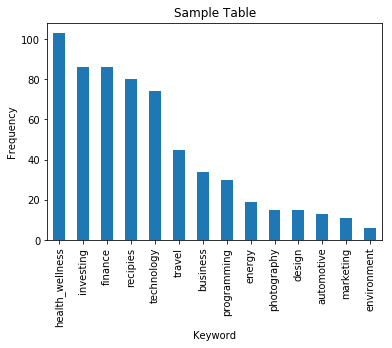

KEYWORDS = ['Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_programming', 'Pocket_SaveTopic_Month_insurance']


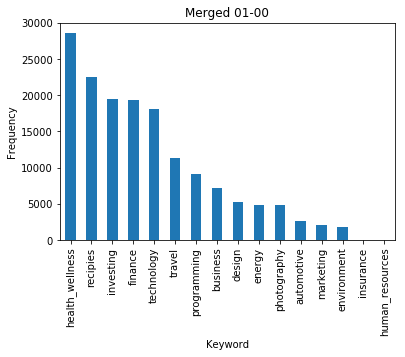

KEYWORDS = ['Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


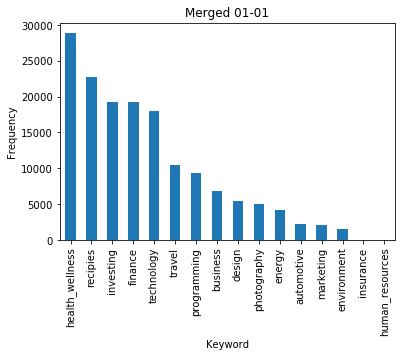

KEYWORDS = ['Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_UserAge_Month_GreaterThan_1', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_human_resources', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


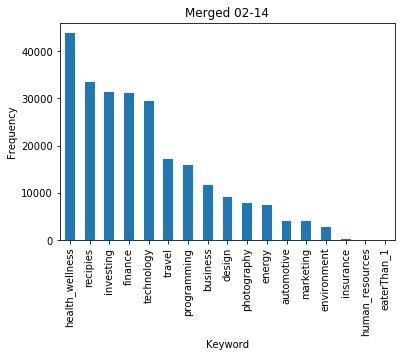

KEYWORDS = ['Pocket_SaveTopic_Month_design', 'Pocket_SaveTopic_Month_insurance', 'Pocket_SaveTopic_Month_travel', 'Pocket_SaveTopic_Month_finance', 'Pocket_SaveTopic_Month_energy', 'Pocket_SaveTopic_Month_health_wellness', 'Pocket_SaveTopic_Month_business', 'Pocket_SaveTopic_Month_marketing', 'Pocket_SaveTopic_Month_automotive', 'Pocket_SaveTopic_Month_environment', 'Pocket_SaveTopic_Month_technology', 'Pocket_SaveTopic_Month_human_resources', 'taboola_via_adsnative-dynamic', 'Pocket_SaveTopic_Month_investing', 'Pocket_SaveTopic_Month_recipies', 'Pocket_SaveTopic_Month_photography', 'Pocket_SaveTopic_Month_programming']


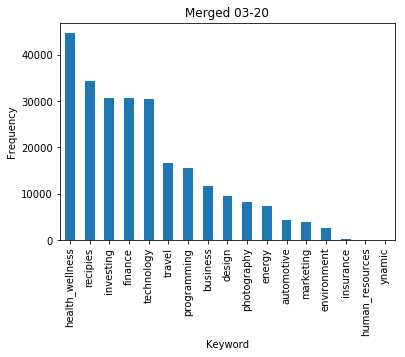

In [79]:
from collections import defaultdict

def graph_keywords(table, title):
    nonemptykeywords = table[table['keywords'] != ''] # this pulls out all of the user rows
    keywords = nonemptykeywords['keywords'] # pulls out only keywords column
    
    # We manually aggregate values because every cell value contains a string with potentially multiple keywords
    keyword_count = defaultdict(lambda: 0, {})
    for elem in keywords:
        words = elem.split(',')
        for word in words:
            keyword_count[word] += 1

    PREFIX = "Pocket_SaveTopic_Month_"

    KEYWORDS = list(keyword_count.keys())
    print("KEYWORDS =", KEYWORDS)

    count_map = {key[len(PREFIX):]: value for key, value in keyword_count.items()}
    s = pd.Series(count_map).sort_values(ascending=False)
    graph = s.plot(kind="bar", title=title)
    graph.set_xlabel("Keyword")
    graph.set_ylabel("Frequency")
    plt.show()



# graph_keywords(small, "Sample Table")
# graph_keywords(table00, "Merged 01-00")
# graph_keywords(table01, "Merged 01-01")
# graph_keywords(table14, "Merged 02-14")
# graph_keywords(table20, "Merged 03-20")

### Histogram of times during the day when ads were displayed

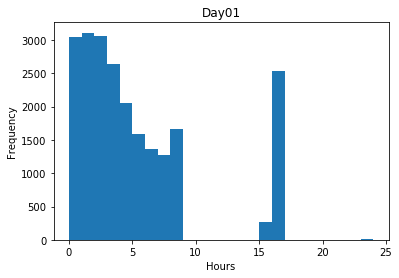

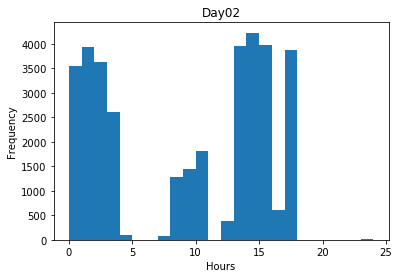

Did not find timestamp at index 862250
Did not find timestamp at index 863760
Did not find timestamp at index 868626
Did not find timestamp at index 870157
Did not find timestamp at index 871780
Did not find timestamp at index 875119
Did not find timestamp at index 880974
Did not find timestamp at index 885769
Did not find timestamp at index 888531
Did not find timestamp at index 891409
Did not find timestamp at index 892720
Did not find timestamp at index 896323
Did not find timestamp at index 899722
Did not find timestamp at index 900286
Did not find timestamp at index 902782
Did not find timestamp at index 909327
Did not find timestamp at index 914103
Did not find timestamp at index 917586
Did not find timestamp at index 917627
Did not find timestamp at index 918414
Did not find timestamp at index 920705
Did not find timestamp at index 921421
Did not find timestamp at index 922172
Did not find timestamp at index 922781
Did not find timestamp at index 925063
Did not find timestamp at

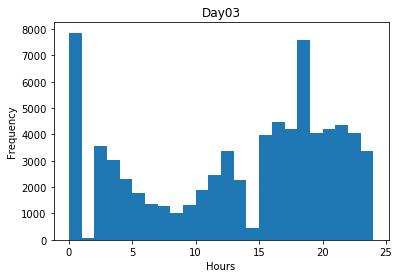

In [7]:
import parse
def graph_time(table, title):
    # Replace values in timestamp columns
    # We are using r_timestamp which is when an ad is requested
    # An alternative is i_timestamp which is when the impression is made,
    # but there are many more NaNs because only the winning ad is displayed/impression is made
    FORMAT = "{0}T{1}:{2}:{3}Z"
    copy = table["r_timestamp"].copy()
    assert len(copy.shape) == 1, "Incorrect copy dimensions"
    for i in range(copy.size):
        t = copy.iloc[i]
        date, h, m, s = parse.parse(FORMAT, t)
        # NOTE we assume everything is in one day
        h, m, s = float(h), float(m), float(s)
        inseconds = h*60*60 + m*60 + s
        inhours = inseconds / 3600
        copy.iloc[i] = inhours
    timeplot = copy.plot(kind="hist", bins=24, title=title)
    timeplot.set_xlabel("Hours")
    plt.show()
    
# To save us a lot of time from converting the entire file to a DataFrame
def extract_times(filename):
    f = open(filename, 'r')
    FINDSTR = '"r_timestamp": '
    TIMESTAMP_FORMAT = '"YYYY-MM-DDTHH:MM:SS.SSSSSSZ"'
    count = 0
    rows_list = []
    for line in f:
        index = line.find(FINDSTR)
        if index == -1:
            print("Did not find timestamp at index", count)
        else:
            timestamp = line[index+len(FINDSTR)+1:index+len(FINDSTR)+len(TIMESTAMP_FORMAT)-1]
        rows_list.append({"r_timestamp": timestamp})
        count += 1
    return pd.DataFrame(rows_list)
    
# TODO uncomment following line when kernel is restarted; avoiding rerunning for now
df01 = extract_times("data/merged-01-xx") ####
graph_time(df01.sample(frac=0.01), "Day01")
df02 = extract_times("data/merged-02-xx") ####
graph_time(df02.sample(frac=0.01), "Day02")
df03 = extract_times("data/merged-03-xx") ####
graph_time(df03.sample(frac=0.01), "Day03")
df04 = extract_times("data/merged-04-xx") ####
graph_time(df04.sample(frac=0.01), "Day04")

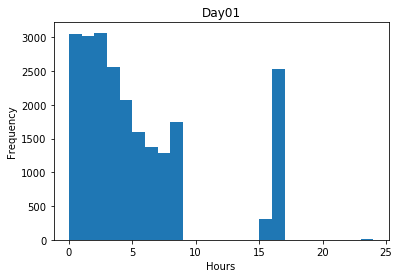

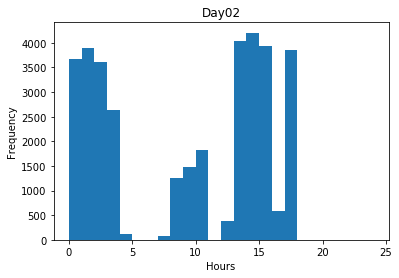

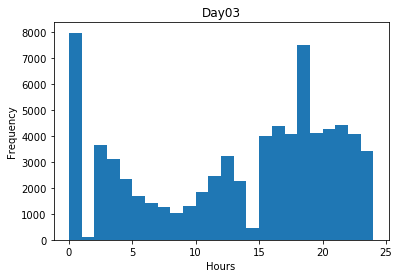

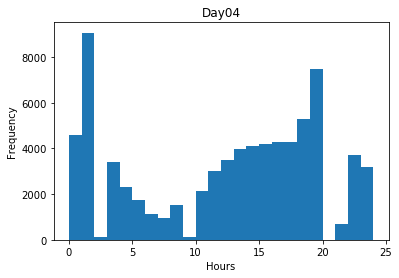

In [12]:
graph_time(df01.sample(frac=0.01), "Day01")
graph_time(df02.sample(frac=0.01), "Day02")
graph_time(df03.sample(frac=0.01), "Day03")
graph_time(df04.sample(frac=0.01), "Day04")

In [10]:
print(df01.shape)
print(df02.shape)
print(df03.shape)

(2262922, 1)
(3553430, 1)
(7430984, 1)


### Number of Ads Displayed

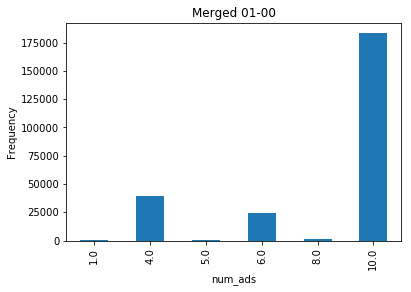

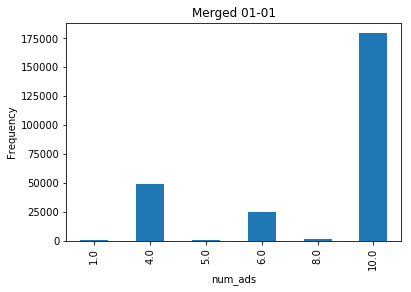

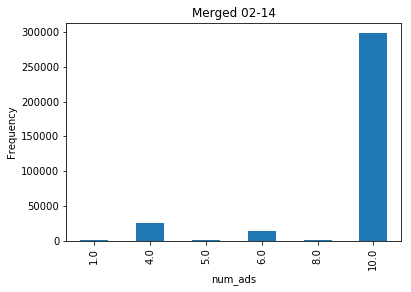

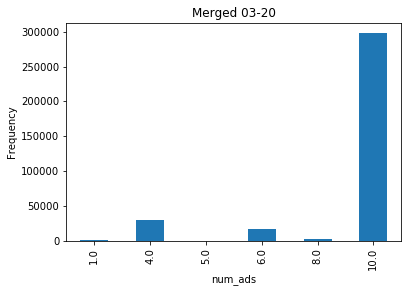

In [219]:
def graph_numads(table, title):
    numads = table[["num_ads"]].dropna()
    grouped = numads.groupby("num_ads").size()
    graph = grouped.plot.bar()
    graph.set_ylabel("Frequency")
    graph.set_title(title)
    plt.show()

# graph_numads(table00, "Merged 01-00")
# graph_numads(table01, "Merged 01-01")
# graph_numads(table14, "Merged 02-14")
# graph_numads(table20, "Merged 03-20")

### OHE keywords

In [21]:
def add_keywords(table):
    nonemptykeywords = table[table['keywords'] != ''] # this pulls out all of the user rows
    keywords = nonemptykeywords['keywords'] # pulls out only keywords column
    
    cols_append = {}
    
    # We manually aggregate values because every cell value contains a string with potentially multiple keywords
    curr_len = 0
    for elem in keywords:
        for key in cols_append.keys():
            cols_append[key].append(0)
        words = elem.split(',')
        for word in words:
            if word in cols_append.keys():
                cols_append[word][-1] = 1
            else:
                cols_append[word] = [0] * curr_len + [1]
        curr_len += 1

    df_append = pd.DataFrame(cols_append)
    df_appendto = nonemptykeywords.drop(['keywords'], axis=1)    
    return df_appendto.join(df_append)

add_keywords(table00)

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,bid_requests,bid_responses,c_cnt,c_flag_cnt,c_timestamp,c_txn_fee,c_txn_rate,campaign_id,campaign_type,ck,cr_cnt,creative_id,exp_mode,f_cnt,flag,geo_area_code,geo_city_code,geo_city_name,geo_continent_code,geo_country_code2,geo_country_code3,geo_dma_code,geo_postal_code,geo_region_name,geo_timezone,i_cnt,i_flag_cnt,i_timestamp,i_txn_fee,i_txn_rate,ip_address,is_bot,is_fraud,num_ads,preview,pub_campaign_id,pub_network_id,r_cnt,r_num_ads_requested,r_num_ads_returned,r_num_ads_third_party,r_timestamp,rate_metric,referer,session_id,site_id,token,txn_fee,txn_rate,ua,ua_device,ua_device_type,ua_major,ua_minor,ua_name,ua_os,ua_os_name,url,user_agent,uuid,vi_cnt,vi_flag_cnt,vi_timestamp,vv_cnt,widget_id,zone_id,Pocket_SaveTopic_Month_automotive,Pocket_SaveTopic_Month_business,Pocket_SaveTopic_Month_design,Pocket_SaveTopic_Month_energy,Pocket_SaveTopic_Month_environment,Pocket_SaveTopic_Month_finance,Pocket_SaveTopic_Month_health_wellness,Pocket_SaveTopic_Month_human_resources,Pocket_SaveTopic_Month_insurance,Pocket_SaveTopic_Month_investing,Pocket_SaveTopic_Month_marketing,Pocket_SaveTopic_Month_photography,Pocket_SaveTopic_Month_programming,Pocket_SaveTopic_Month_recipies,Pocket_SaveTopic_Month_technology,Pocket_SaveTopic_Month_travel
3,an-prod-ralphie-frontline-goofs.us-east-1,727,[story],1,4909,[],[],NaN,NaN,NaN,NaN,NaN,26801,outside,,1,5639350,0.0,NaN,NaN,510.0,5355933.0,Hayward,NA,US,USA,807.0,94541,CA,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,172.58.38.241,NaN,False,NaN,NaN,NaN,727,1,1,1,0,2018-04-01T00:29:13.267027Z,CPM,,709d2c3baf6147fdba39a75a09cd1761_0611b821,10481,MPA9WFG3,NaN,NaN,Mozilla/5.0 (Linux; Android 8.0.0; Pixel 2 Bui...,Pixel 2,MOB,62.0,0.0,Chrome Mobile,Android 8.0,Android,http://getpocket.com,NaN,429TaA7bgeWM3pk04ed1783dc1p4g4e349bc6flc28o91b...,NaN,NaN,NaN,NaN,NaN,14414,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
14,an-prod-ralphie-frontline-goofs.us-east-1,727,[story],1,5308,[],[],NaN,NaN,NaN,NaN,NaN,26941,outside,,1,5811989,0.0,NaN,NaN,NaN,6077243.0,Montral,NA,CA,CAN,NaN,H2S,QC,America/Montreal,NaN,NaN,NaN,NaN,NaN,74.58.165.96,NaN,False,NaN,NaN,NaN,727,1,1,1,0,2018-04-01T00:37:05.405005Z,CPM,,355e2195b0b5407db0dbba58c678787c_efbf840a,10481,G5Q8PZBM,NaN,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3 like M...,iPhone,MOB,11.0,3.0,Mobile Safari UI/WKWebView,iOS 11.3,iOS,http://getpocket.com,NaN,d51A5g30d67b9TkS3bpb401p36T3dM5aM15es2KK68nZ40...,NaN,NaN,NaN,NaN,NaN,14414,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
21,an-prod-ralphie-frontline-jerid.us-east-1,727,[story],1,5308,[],[],NaN,NaN,NaN,NaN,NaN,26941,outside,,1,5811989,0.0,NaN,NaN,NaN,NaN,NaN,AS,PH,PHL,NaN,NaN,NaN,Asia/Manila,NaN,NaN,NaN,NaN,NaN,49.145.156.54,NaN,False,NaN,NaN,NaN,727,1,1,1,0,2018-04-01T00:01:00.813473Z,CPM,,6f378715a60d4f0695752a3c063bcb30_edf40b65,10481,G5Q8PZBM,NaN,NaN,Mozilla/5.0 (Linux; Android 5.0; SM-N9005 Buil...,Samsung SM-N9005,MOB,43.0,0.0,Chrome Mobile,Android 5.0,Android,http://getpocket.com,NaN,f71d4p9cT167bg9888A7936Abzg5Tb84d22K28c574uFu3...,NaN,NaN,NaN,NaN,NaN,14414,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
36,an-prod-ralphie-frontline-laris.us-east-1,727,[story],1,4909,[],[],NaN,NaN,NaN,NaN,NaN,26801,outside,,1,5639348,2.0,NaN,NaN,772.0,4176409.0,Vero Beach,NA,US,USA,548.0,32960,FL,America/New_York,NaN,NaN,NaN,NaN,NaN,69.247.233.161,NaN,False,NaN,NaN,NaN,727,1,1,1,0,2018-04-01T00:52:36.345553Z,CPM,,18b94009f44c44e1ad0bef1e4d8d0b12_0fc9995d,10481,HZMFRVNG,NaN,NaN,Mozilla/5.0 (iPad; CPU OS 11_3 like Mac OS X) ...,iPad,TAB,11.0,3.0,Mobile Safari UI/WKWebView,iOS 11.3,iOS,http://getpocket.com,NaN,5ejASg73deP78T2c3ep1d06p38T3d8818b9W52R074n50V...,NaN,NaN,NaN,NaN,NaN,14414,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
52,an-prod-ralphie-frontline-bedim.us-east-1,727,[story],1,5308,[],[],NaN,NaN,NaN,NaN,NaN,26941,outside,,1,5811989,1.0,NaN,NaN,NaN,3463237.0,Florianopolis,SA,BR,BRA,NaN,NaN,26,America/S

### IGNORE SECTION

In [42]:
small.columns

Index(['_host', 'ad_network_id', 'ad_type', 'adlog_count', 'advertiser_id',
       'bid_requests', 'bid_responses', 'c_cnt', 'c_flag_cnt', 'c_timestamp',
       'campaign_id', 'campaign_type', 'ck', 'cr_cnt', 'creative_id',
       'exp_mode', 'f_cnt', 'flag', 'geo_area_code', 'geo_city_code',
       'geo_city_name', 'geo_continent_code', 'geo_country_code2',
       'geo_country_code3', 'geo_dma_code', 'geo_postal_code',
       'geo_region_name', 'geo_timezone', 'i_cnt', 'i_flag_cnt', 'i_timestamp',
       'i_txn_fee', 'i_txn_rate', 'ip_address', 'is_bot', 'is_fraud',
       'keywords', 'num_ads', 'pub_campaign_id', 'pub_network_id', 'r_cnt',
       'r_num_ads_requested', 'r_num_ads_returned', 'r_num_ads_third_party',
       'r_timestamp', 'rate_metric', 'referer', 'session_id', 'site_id',
       'token', 'txn_fee', 'txn_rate', 'ua', 'ua_device', 'ua_device_type',
       'ua_major', 'ua_minor', 'ua_name', 'ua_os', 'ua_os_name', 'url',
       'user_agent', 'uuid', 'vi_cnt', 'vi_flag_cnt'

In [ ]:
# EDIT THIS as needed
# NOTE somehow (in 01-00, 01-01, 02-14, 03-20 at least) there was not a single filled bid_request column
useless_all = []
# only one value
useless_all.extend(['adlog_count', 'cr_cnt', 'r_num_ads_third_party'])
# no values
useless_all.extend(['bid_requests', 'bid_responses'])

useless_ads = []
useless_clicks = []
filtered = small.drop(useless)